In [4]:
# Imports

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

Saving metacritic_games_cleaned.csv to metacritic_games_cleaned.csv


In [11]:
def open_file(path: str) -> str:
    content = ""
    with open(path, "r") as f:
        content = f.readlines()
    return " ".join(content)

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['metacritic_games_cleaned.csv']))
df.head()

,game,platform,developer,genre,rating,release_date,metascore,user_score
0,Portal 2,PC,Valve Software,Action,E10+,"Apr 18, 2011",95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,M,"Nov 10, 2011",94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,E10+,"Jun 19, 2011",94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,T,"Nov 21, 2011",91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,E,"Nov 13, 2011",90,84


In [9]:
developer_df = df[['developer']]
developer_df.head()

,developer
0,Valve Software
1,Bethesda Game Studios
2,GREZZO
3,Rocksteady Studios
4,Nintendo


In [10]:
#specify path for export
path = r'texto.txt'

#export DataFrame to text file
with open(path, 'a') as f:
    df_string = developer_df.to_string(header=False, index=False)
    f.write(df_string)

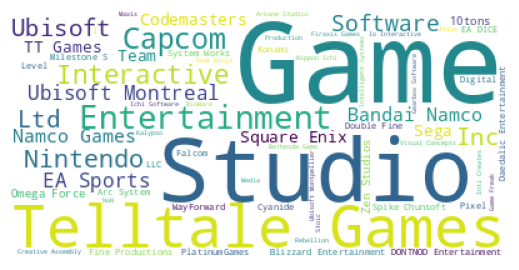

In [14]:
all_words = ""
frase = open_file("texto.txt") # "hola a todos muchas  palabras palabras hola muchas hola hola hola palabras palabras hola muchas hola hola hola palabras palabras hola muchas hola hola hola palabras palabras hola muchas hola hola hola"
palabras = frase.rstrip().split(" ")

Counter(" ".join(palabras).split()).most_common(10)
# looping through all incidents and joining them to one text, to extract most common words
for arg in palabras:
    tokens = arg.split()
    all_words += " ".join(tokens) + " "

# print(all_words)
wordcloud = WordCloud(
    background_color="white", min_font_size=5
).generate(all_words)

plt.close()
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
plt.close()